# Распространение тепла

### Условие задачи

**Дано:**
- твердое тело, в массе которого распространяется тепло от нескольких источников
- тело - куб $[0, L] x [0, L] x [0, L]$ с коэффициентом диффузии $D = 1.0$
- в центре куба расположен шар радиуса $R = L/5$ с низким коэффициентом диффузии $D_R = 10^{-16}$
- $T_0 = 0$ - начальная температура во всем объеме куба
- граничные условия на гранях куба двух видов:
    - фиксированная температура (0 градусов) на гранях
        - $x = 0$
        - $y = L$
    - абсолютная теплоизоляция на гранях
        - $x = L$
        - $y = 0$ 
        - $z = 0$
        - $z = L$ 
- в массе куба расположены источники тепла, мощность которых меняется по периодическому закону $\dot{q}_i = p_i \cdot (sin(\frac{2\pi}{\theta_i}t + \phi_i) + 1)$

    - пластина 0:
        - центр $(0.2L, 0.5L, 0.5L)$
        - размеры (от центра до края) $(4/dx, 0.2L, 0.2L)$
        - $p_0 = 100$, $\theta_0 = 50$, $\phi_0 = 0$
        
    - пластина 1:
        - центр $(0.5L, 0.2L, 0.5L)$
        - размеры (от центра до края) $(0.2L, 4/dx, 0.2L)$
        - $p_0 = 100$, $\theta_0 = 77$, $\phi_0 = 10$
    
- координаты проб, для которых необходимо построить графики изменения температуры от времени
    - проба 0: $(0.3L, 0.3L, 0.5L)$
    - проба 1: $(0.3L, 0.7L, 0.5L)$
    - проба 2: $(0.7L, 0.7L, 0.5L)$
    - проба 3: $(0.7L, 0.3L, 0.5L)$
    
- $dx$ - шаг пространственного разбиения по всем трем измерениям
- $t_m = 600$ c - общее время моделирования

![](heat_transfer_task.png)
<center>Рис. 1. Сечение тела плоскостью z=L/2</center>


**Требуется:**
- согласно уравнению диффузии смоделировать распространение тепла в кубе на заданное время $t_m$ при:
    - $L = 100$
    - $(dx, dt) \in [(4, 0.2), (2, 0.1), (1, 0.05), (0.5, 0.025)]$
    
    
- для каждой пары $(dx, dt)$:
    1. вывести время расчета
    
    2. сохранить в файл(ы) и использовать в пунктах 3-5:
        - температурное поле в конечный момент времени
        - замеры температуры в местах установки проб

    3. построить цветовую карту в конечный момент времени в сечении $z = 0.5L$
        - подписать оси,
        - отобразить цветовую шкалу (colorbar),
        - отобразить пробы в виде точек и подписать их номера.

    4. на одном рисунке построить графики температур в местах установки проб
        - подписать оси,
        - вывести легенду.

    5. используя быстрое преобразование Фурье, восстановить периоды колебаний температуры в местах установки проб
        - `np.fft.rfft`, `np.fft.rfftfreq`, `scipy.signal.find_peaks`
    

**Описание:**

Распространение тепла можно описать при помощи уравнения диффузии (уравнение с частными производными):

$\frac{\partial{T}}{\partial{t}} = D \left(\frac{\partial^2{T}}{\partial{x^2}} + \frac{\partial^2{T}}{\partial{y^2}} + \frac{\partial^2{T}}{\partial{z^2}} \right) + \dot{q}$, где

- $T(t, x, y, z)$ - поле температур
- $D(x, y, z)$ - коэффициент диффузии
- $\dot q(t, x, y, z)$ - функция источников тепла

Для решения нестационарной задачи распространения тепла рассматриваемое тело представляют в виде сетки с равномерным шагом, а дифференциальное уравнение заменяют на конечно-разностное. Рассмотрим схему `FTCS`, т.е. производная по времени заменяется на правую разность (Forward Time), а вторая производная по пространственным переменным заменяется на центральную разность (Central Space).

$\frac{\partial{T}}{\partial{t}} \rightarrow \frac{T^{n}_{i,j,k} - T^{n-1}_{i,j,k}}{dt}$

$\frac{\partial^2{T}}{\partial{x^2}} \rightarrow \frac{T^{n-1}_{i-1,j,k} - 2T^{n-1}_{i,j,k} + T^{n-1}_{i+1,j,k}}{dx^2}, ...$


$\frac{T^{n}_{i,j} - T^{n-1}_{i,j}}{dt} = \frac{D_{i,j}}{dx^2} \left(T^{n-1}_{i-1,j,k} + T^{n-1}_{i+1,j,k} + T^{n-1}_{i,j-1,k}  + T^{n-1}_{i,j+1,k} + T^{n-1}_{i,j,k-1} + T^{n-1}_{i,j,k+1} - 6T^{n-1}_{i,j,k}\right) + \dot{q}$

Итоговая рекуррентная формула для вычисления температуры в момент времени $n \cdot dt$ в ячейке сетки $(i, j, k)$ на основании данных в момент времени $(n-1) \cdot dt$:

$T^{n}_{i,j} = T^{n-1}_{i,j} + \frac{dt D_{i,j,k}}{dx^2} \left(T^{n-1}_{i-1,j,k} + T^{n-1}_{i+1,j,k} + T^{n-1}_{i,j-1,k}  + T^{n-1}_{i,j+1,k} + T^{n-1}_{i,j,k-1} + T^{n-1}_{i,j,k+1} - 6T^{n-1}_{i,j,k}\right) + dt \cdot \dot{q}^{n}_{i,j,k}$

Временной шаг $dt$ должен быть таким, чтобы учитывать условие Курранта: $dt = \frac{C \cdot dx}{D}$, где $C$ - число Курранта.

В этой задаче рассматриваются граничные условия двух видов - фиксированная температура и абсолютная теплоизоляция. Оба вида граничных условий указаны на гранях куба. Таким образом, расчет распространения тепла выполняется для всех ячеек сетки, за исключением расположенных на гранях куба, т.е. $i, j, k \in (0, N-1)$, где $N = L / dx$.
Граничное условие в виде фиксированной температуры записывается в соответствующие граням куба ячейки сетки. 

Например, для грани $x = 0$: $T^{n}_{0,j,k} = T_*$, грани $x = L$: $T^{n}_{N-1,j,k} = T_*$. 


Граничное условие в виде абсолютной теплоизоляции означает, что через заданную грань нет потока тепла, а это достижимо, если температура в ячейках грани и прилегающим к ним ячейкам одинаковая. 

Например, $x = 0$: $T^{n}_{0,j,k} = T^{n}_{1,j,k}$, грани $x = L$: $T^{n}_{N-1,j,k} = T^{n}_{N-2,j,k}$.


**Материалы:**

- [Уравнение теплопроводности](https://ru.wikipedia.org/wiki/Уравнение_теплопроводности)
- [Solving 2D heat equation numerically using python](https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a)
- [Diffusion Eq 2D with Source](https://www.youtube.com/watch?v=aCRYfvh_bnY)


**Правила оценивания:**

- оценка за корректно выполненный расчет для пространственного шага $dx$, баллов из 100:
```
    dx    =   4,  2,  1, 0.5
    g(dx) =  10, 20, 30,  40
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выполнено сохранение результатов в файл(ы) - 20
    - построение графиков не использует сохраненные результаты - 20
    - не построены графики температур в местах установки проб - 20
    - не построена карта - 20
    - не посчитаны периоды колебаний - 20
    - менее значимые недоработки - 10
    
    
- бонусы $b(j)$, баллов:
    - выполнить задания для $(dx, dt) = (0.25, 0.01)$ - 20


- итоговая оценка за задание = $\sum_{n=1}^{4}{g(L)} - \sum_{i}{p(i)} + \sum_{j}{b(j)}$


Масликов Дмитрий БПМ191

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import math
from numba import njit, prange
import time
import holoviews as hv
from tqdm import trange, tqdm
import seaborn as sns
import copy
from scipy.signal import find_peaks

Неизменные константы:

In [2]:
L = 100  #длина ребра куба
D = 1.0  #коэффициент диффузии в кубе за исключением шара в его центре
D_round = 1e-16  #коэффициент диффузии в шаре в центре куба
R_round = L/5  #радиус шара
T0 = 0.0  #начальная температура
max_time = 600  #общее время моделирования

#Набор значений пространственного и временного шагов
dxdt = [(4, 0.2), (2, 0.1), (1, 0.05), (0.5, 0.025), (0.25, 0.01)]
#Позиции проб
abs_probes = [np.array([0.3*L, 0.3*L, 0.5*L], dtype=int),
                np.array([0.3*L, 0.7*L, 0.5*L], dtype=int),
                np.array([0.7*L, 0.7*L, 0.5*L], dtype=int),
                np.array([0.7*L, 0.3*L, 0.5*L], dtype=int)]

Функция для одного шага диффузии:

In [140]:
@njit(parallel=True)    
def diffuse_step_par(ti, T, Dxyz, dx, dt):
    """
    Моделирует один шаг диффузии в трёхмерном поле температур T
    с соответствующими коэффициентами диффузии, хранящимися в массиве Dxyz.
    Используется рекуррентная формула для вычисления температуры в ячейках
    трёхмерной сетки на основании данных в предыдущий момент времени.
    
    Параметры:
    ----------
    ti: int
        Номер шага диффузии.
    T: ({{}, {}, {}}, {{}, {}, {}}) array_like
        Двойной трёхмерный массив, в одной части которого хранятся данные
        о температурах в трехмерном поле в предыдущий момент времени,
        а во вторую часть будут записаны обновленные температурные данные
        после очередного диффузного шага.
    Dxyz: ({{}, {}, {}}) array_like
        Трёхмерный массив, хранящий данные о коэффициентах диффузии 
        в каждой конкретной точке трёхмерного температурного поля T.
    dx: float
        Пространственный шаг.
    dt: float
        Временной шаг.
    """
    ti = ti % 2
    tj = (ti + 1) % 2
    nx_c = int(L/dx)
    for i in prange(1, nx_c - 1):
        for j in range(1, nx_c - 1):
            for k in range(1, nx_c - 1):
                g = dt * Dxyz[i, j, k] / dx**2
                T[tj, i, j, k] = T[ti, i, j, k] + \
                                 g * (T[ti, i+1, j, k] +
                                      T[ti, i-1, j, k] +
                                      T[ti, i, j+1, k] +
                                      T[ti, i, j-1, k] +
                                      T[ti, i, j, k+1] +
                                      T[ti, i, j, k-1] -
                                      6 * T[ti, i, j, k]
                                     )

Функция для учёта абсолютной теплоизоляции на 4 гранях:

In [87]:
def isolation(T):
    """
    Моделирует абсолютную изоляцию на 4 гранях куба, на которых
    она задана по условию задачи.
    
    Параметры:
    ----------
    T: ({{}, {}, {}}, {{}, {}, {}}) array_like
        Двойной трёхмерный массив, в одной части которого хранятся данные
        о температурах в трехмерном поле в предыдущий момент времени,
        а во второй части в текущий момент времени. 
    """
    T[:, -1] = T[:, -2]    #x = L
    T[:, :,  0] = T[:, :,  1] #y = 0
    T[:, :, :, 0] = T[:, :, :, 1] #z = 0
    T[:, :, :, -1] = T[:, :, :, -2] #z = L

Функция, моделирующая источники тепла в кубе(пластины):

In [88]:
def source(it, T, dt):
    """
    Моделирует влияние источников тепла на трёхмерное поле температур T
    с заданными в условии задачи параметрами.
    
    Параметры:
    ----------
    ti: int
        Номер шага диффузии.
    T: ({{}, {}, {}}, {{}, {}, {}}) array_like
        Двойной трёхмерный массив, в одной части которого хранятся данные
        о температурах в трехмерном поле в предыдущий момент времени,
        а во второй части в текущий момент времени. 
    dt: float
        Временной шаг.
    """
    cur = it % 2
    q = 100 * (math.sin((2*math.pi/50)*it*dt) + 1)
    T[cur, left0:right0, bottom0:top0, back0:front0] += dt * q
    q = 100 * (math.sin((2*math.pi/77)*it*dt + 10) + 1)
    T[cur, left1:right1, bottom1:top1, back1:front1] += dt * q
    

Основной цикл для расчётов по всем парам (dx, dt):

In [144]:
for pair in range(len(dxdt)):
    dx = dxdt[pair][0]
    dt = dxdt[pair][1]
    
    iterations = int(max_time / dt) #необходимое количество шагов диффузии
    
    nx = int(L/dx) #количество ячеек по всем трём измерениям куба
    
    #Позиция и размер нагревателей(пластин)
    pos0 = np.array([0.2*L/dx, 0.5*L/dx, 0.5*L/dx], dtype=int)
    size0 = np.array([4/dx, 0.2*L/dx, 0.2*L/dx], dtype=int)
    
    pos1 = np.array([0.5*L/dx, 0.2*L/dx, 0.5*L/dx], dtype=int)
    size1 = np.array([0.2*L/dx, 4/dx, 0.2*L/dx], dtype=int)
    
    #Границы пластин
    
    left0 = pos0[0] - size0[0]
    right0 = left0 + 2*size0[0]
    bottom0 = pos0[1] - size0[1]
    top0 = bottom0 + 2*size0[1]
    back0 = pos0[2] - size0[2]
    front0 = back0 + 2*size0[2]

    left1 = pos1[0] - size1[0]
    right1 = left1 + 2*size1[0]
    bottom1 = pos1[1] - size1[1]
    top1 = bottom1 + 2*size1[1]
    back1 = pos1[2] - size1[2]
    front1 = back1 + 2*size1[2]
    
    #Позиции проб для текущего пространственного шага
    probes = copy.deepcopy(abs_probes)
    for ip in range(4):
        for jp in range(3):
            probes[ip][jp]/=dx
    
    #Задание матрицы для хранения коэффициентов диффузии
    Dxyz = np.full((nx, nx, nx), D, dtype=float)
    for i in range(nx):
        for j in range(nx):
            for k in range(nx):
                if ((i-nx//2)**2 + (j-nx//2)**2 + (k-nx//2)**2) <= (R_round/dx)**2:
                    Dxyz[i][j][k] = D_round
                                   
    #Матрица для хранения поля температур в предыдущий и текущий моменты времени.
    #При создании заполняем её нулям(так как начальная температура T0=0)
    T = np.zeros((2, nx, nx, nx))
    temps = [[],[],[],[]] #матрица для хранения температур в местах установки проб
    
    cur_time = time.time() #засечение времени расчётов
    #Моделирование распространения тепла в заданных выше условиях
    for it in trange(iterations):
        source(it, T, dt)
        diffuse_step_par(it, T, Dxyz, dx, dt)
        isolation(T)

        temps[0].append(T[it%2, probes[0][0],probes[0][1],probes[0][2]])
        temps[1].append(T[it%2, probes[1][0],probes[1][1],probes[1][2]])
        temps[2].append(T[it%2, probes[2][0],probes[2][1],probes[2][2]])
        temps[3].append(T[it%2, probes[3][0],probes[3][1],probes[3][2]])
    
    print('Simulation time for the pair (dx, dt) = ('+str(dxdt[pair][0])+', '+str(dxdt[pair][1])+'):', time.time() - cur_time)
    #Сохранение результатов расчётов в соответствующие файлы
    np.save('Temp_matrix'+str(pair), T)
    np.save('Temp_in_probes'+str(pair), temps)
    

  0%|          | 0/6000 [00:00<?, ?it/s]

Simulation time for the pair (dx, dt) = (4, 0.2): 0.60772705078125


100%|██████████| 6000/6000 [00:01<00:00, 3607.02it/s]


Simulation time for the pair (dx, dt) = (2, 0.1): 1.6643729209899902


100%|██████████| 12000/12000 [00:16<00:00, 737.14it/s]


Simulation time for the pair (dx, dt) = (1, 0.05): 16.280277967453003


100%|██████████| 24000/24000 [03:29<00:00, 114.30it/s]


Simulation time for the pair (dx, dt) = (0.5, 0.025): 209.98212218284607


100%|██████████| 60000/60000 [1:22:28<00:00, 12.13it/s]


Simulation time for the pair (dx, dt) = (0.25, 0.01): 4948.34702706337


Построение цветовой карты в конечный момент времени в сечении z=L/2 для каждой пары (dx, dt), используя сохранённые в файлах данные:

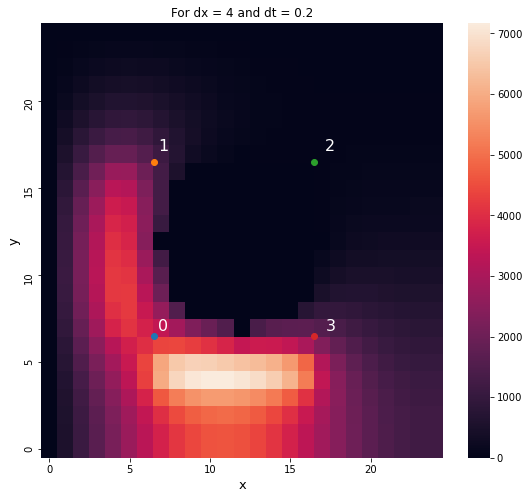

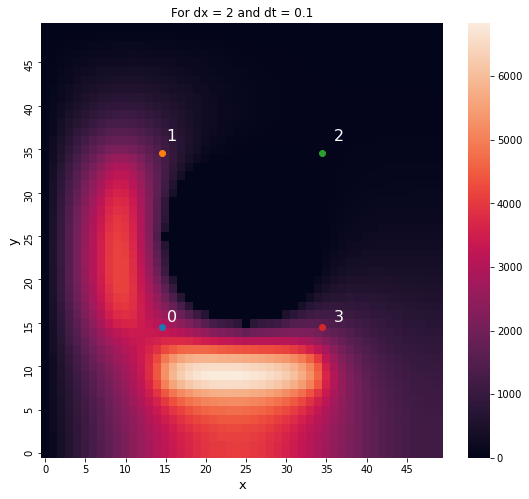

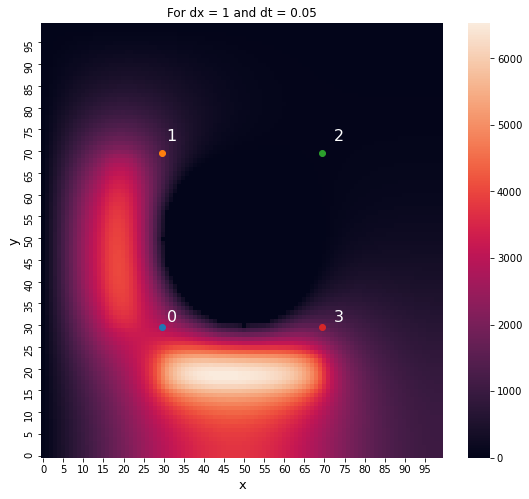

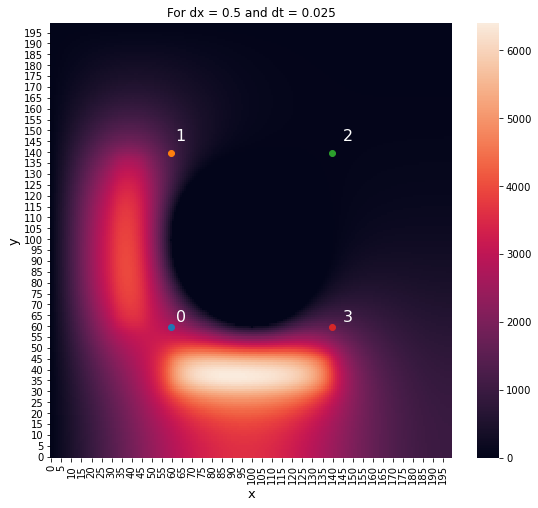

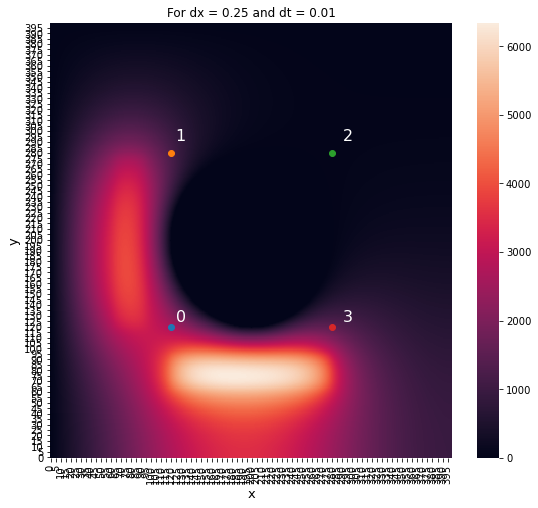

In [151]:
for i in range(len(dxdt)):
    buf = np.load('Temp_matrix'+str(i)+'.npy')
    probes = copy.deepcopy(abs_probes)
    for ip in range(4):
        for jp in range(3):
            probes[ip][jp]/=dxdt[i][0]
    plt.figure(figsize=(9,8))
    sns.heatmap(buf[0, ::, ::, len(buf[0])//2].T, xticklabels=5, yticklabels=5).invert_yaxis()
    plt.xlabel('x', fontsize = 13) 
    plt.ylabel('y', fontsize = 13)
    plt.scatter(probes[0][0], probes[0][1])
    plt.scatter(probes[1][0], probes[1][1])
    plt.scatter(probes[2][0], probes[2][1])
    plt.scatter(probes[3][0], probes[3][1])
    plt.text(probes[0][0]*1.04, probes[0][1]*1.04, 0, fontdict=dict(color='white', size=16))
    plt.text(probes[1][0]*1.04, probes[1][1]*1.04, 1, fontdict=dict(color='white', size=16))
    plt.text(probes[2][0]*1.04, probes[2][1]*1.04, 2, fontdict=dict(color='white', size=16))
    plt.text(probes[3][0]*1.04, probes[3][1]*1.04, 3, fontdict=dict(color='white', size=16))
    plt.title('For dx = '+str(dxdt[i][0])+' and dt = '+str(dxdt[i][1]))
    plt.show()

Отдельно "перерисуем" цветовую карту для случая (dx, dt) = (0.25, 0.01), так как из-за очень мелкого разбиения, получилось настолько много ячеек, что значения на засечках на осях карты выглядят некрасиво. Достаточно увеличить размер изображения:

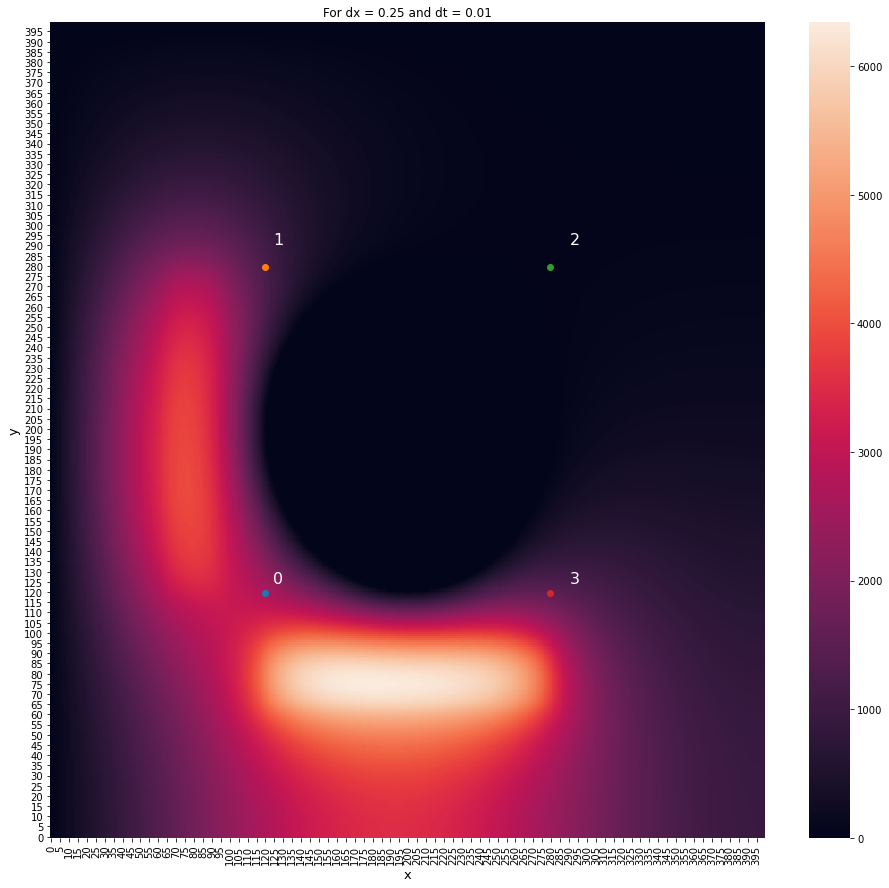

In [160]:
i=4
buf = np.load('Temp_matrix'+str(i)+'.npy')
probes = copy.deepcopy(abs_probes)
for ip in range(4):
    for jp in range(3):
        probes[ip][jp]/=dxdt[i][0]
plt.figure(figsize=(16,15))
sns.heatmap(buf[0, ::, ::, len(buf[0])//2].T, xticklabels=5, yticklabels=5).invert_yaxis()
plt.xlabel('x', fontsize = 13) 
plt.ylabel('y', fontsize = 13)
plt.scatter(probes[0][0], probes[0][1])
plt.scatter(probes[1][0], probes[1][1])
plt.scatter(probes[2][0], probes[2][1])
plt.scatter(probes[3][0], probes[3][1])
plt.text(probes[0][0]*1.04, probes[0][1]*1.04, 0, fontdict=dict(color='white', size=16))
plt.text(probes[1][0]*1.04, probes[1][1]*1.04, 1, fontdict=dict(color='white', size=16))
plt.text(probes[2][0]*1.04, probes[2][1]*1.04, 2, fontdict=dict(color='white', size=16))
plt.text(probes[3][0]*1.04, probes[3][1]*1.04, 3, fontdict=dict(color='white', size=16))
plt.title('For dx = '+str(dxdt[i][0])+' and dt = '+str(dxdt[i][1]))
plt.show()

Построение графиков температур в местах установки проб для каждой пары (dx, dt), используя сохранённые в файлах данные:: 

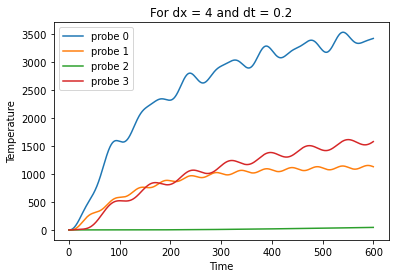

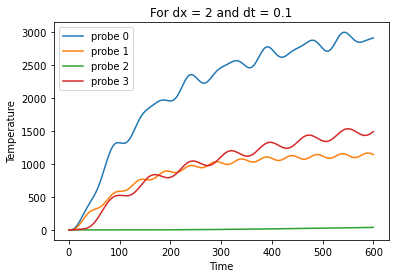

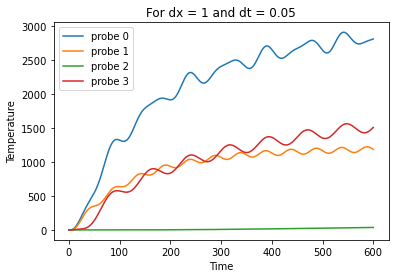

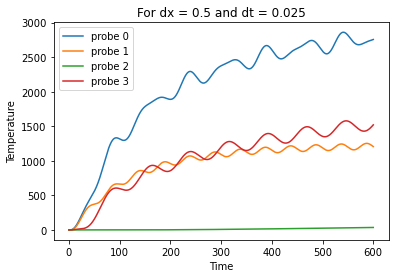

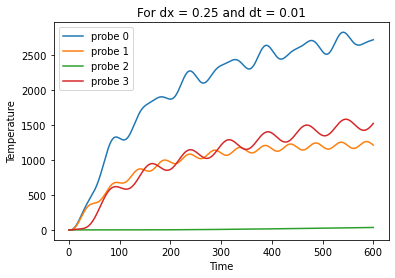

In [146]:
for i in range(len(dxdt)):
    temps = np.load('Temp_in_probes'+str(i)+'.npy')
    tt = np.arange(0., 600., dxdt[i][1])
    plt.plot(tt, temps[0],label='probe 0')
    plt.plot(tt, temps[1],label='probe 1')
    plt.plot(tt, temps[2],label='probe 2')
    plt.plot(tt, temps[3],label='probe 3')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title('For dx = '+str(dxdt[i][0])+' and dt = '+str(dxdt[i][1]))
    plt.legend()
    plt.show()

Восстановление периодов колебаний температуры в местах установки проб для каждой пары (dx, dt), используя сохранённые в файлах данные:

In [7]:
for i in range(len(dxdt)):
    temps = np.load('Temp_in_probes'+str(i)+'.npy')
    print('For dx = '+str(dxdt[i][0])+' and dt = '+str(dxdt[i][1])+':')
    for j in range(len(temps)):
        f = temps[j]
        amp = np.abs(np.fft.rfft(f)) / (len(temps[j])/2)
        freq = np.fft.rfftfreq(len(temps[j]), dxdt[i][1])
        print('  Periods for probe', j, ':', 1/freq[find_peaks(amp)[0]])

For dx = 4 and dt = 0.2:
  Periods for probe 0 : [66.66666667 50.        ]
  Periods for probe 1 : [50.]
  Periods for probe 2 : []
  Periods for probe 3 : [66.66666667]
For dx = 2 and dt = 0.1:
  Periods for probe 0 : [66.66666667 50.        ]
  Periods for probe 1 : [50.]
  Periods for probe 2 : []
  Periods for probe 3 : [66.66666667]
For dx = 1 and dt = 0.05:
  Periods for probe 0 : [66.66666667 50.        ]
  Periods for probe 1 : [50.]
  Periods for probe 2 : []
  Periods for probe 3 : [66.66666667]
For dx = 0.5 and dt = 0.025:
  Periods for probe 0 : [66.66666667 50.        ]
  Periods for probe 1 : [50.]
  Periods for probe 2 : []
  Periods for probe 3 : [66.66666667]
For dx = 0.25 and dt = 0.01:
  Periods for probe 0 : [66.66666667 50.        ]
  Periods for probe 1 : [50.]
  Periods for probe 2 : []
  Periods for probe 3 : [66.66666667]


Замечание:
Из-за того, что проба №2 находится далеко от пластин, и из-за шара в центре куба с низким коэффициентом диффузии нагрев в этой точке практически не происходит, поэтому восстановить периоды колебаний температуры невозможно.

In [7]:
temps = np.load('Temp_in_probes'+str(4)+'.npy')
max(temps[0])

2832.9911824950846